# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

*План выполнения работы:*
1. Чтение файла и изучение общей информации
2. Предобработка данных
3. Преобразование типов данных
4. Удаление выбросов
5. Проведение исследовательского анализа данных
6. Вывод

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Предобработка данных

In [5]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [6]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [7]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [8]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [9]:
#Тк. строк с пропусками в locality_name мало, их можно безопасно удалить
data = data.dropna(subset=['locality_name'])

## Обработка пропущеных значений

Попробуем заполнить пропуски в данных. Логично предположить, что пропуски в полях is_apartment, balcony, parks_around3000, ponds_around3000 стоит заменить нулями (False)

In [10]:
data['balcony'] = data['balcony'].fillna('0')
data['is_apartment'] = data['is_apartment'].fillna('False')
data['parks_around3000'] = data['parks_around3000'].fillna('0')
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')



In [11]:
#Пропуски в полях типа *_nearest заменим на -1
data['airports_nearest'] = data['airports_nearest'].fillna('-1')
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna('-1')
data['parks_nearest'] = data['parks_nearest'].fillna('-1')
data['ponds_nearest'] = data['ponds_nearest'].fillna('-1')

In [12]:
#Пропуски в floors_total можно заменить на этаж в котором находится квартира
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [13]:
data.loc[data['days_exposition'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,-1,0.0,-1,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,False,...,7.0,0,Санкт-Петербург,30011.0,12872.0,0.0,-1,0.0,-1,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,False,...,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,-1,0.0,-1,NaN
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.00,7,False,...,6.0,0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,-1,NaN
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,False,...,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,-1,NaN
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9.0,39.00,8,False,...,6.2,0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,False,...,NaN,0,Санкт-Петербург,-1,-1,0,-1,0,-1,NaN
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,NaN,2.0,27.46,1,False,...,5.2,0,Кировск,-1,-1,0,-1,0,-1,NaN


95.0

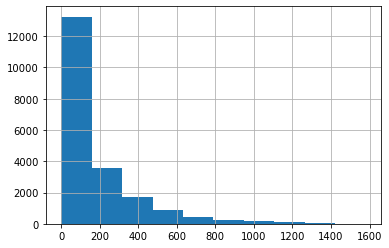

In [14]:
#Исследуем характер данных days_exposition
data['days_exposition'].hist()
data['days_exposition'].median()

In [15]:
#Можно заменить пропуски на медианное значение
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

In [16]:
#Обработаем пропуски в полях kitchen_area, living_area. Чтобы их заполнить попробуем разделить
#все объекты на категории по значению total_area, затем заполнить пропуски медианными значениями
#соответствующей категории
print(data['total_area'].quantile(0.33))
print(data['total_area'].quantile())
print(data['total_area'].quantile(0.67))
print(data['total_area'].quantile(0.8))

43.4
52.0
62.2
74.9


In [17]:
def area_category(row):
    size = row.get('total_area')
    if size < 43.4:
        return 1
    elif size < 52.0:
        return 2
    elif size < 62.2:
        return 3
    elif size < 74.9:
        return 4
    else:
        return 'large'
    

In [18]:
data['area_category'] = data.apply(area_category, axis=1)

In [19]:
def fill_living(row):
    area_category = row[-1]
    if area_category in [1, 2, 3, 4]:
        return int(data.loc[data['area_category'] == area_category, 'living_area'].median())
    else:
        return 'unknown'

In [20]:
data['_living_area'] = data.apply(fill_living, axis=1)
data['living_area'] = data['living_area'].fillna(data['_living_area'])
data = data.iloc[:, :-1]

In [21]:
def fill_kitchen(row):
    area_category = row[-1]
    if area_category in [1, 2, 3, 4]:
        return int(data.loc[data['area_category'] == area_category, 'kitchen_area'].median())
    else:
        return 'unknown'

In [22]:
data['_kitchen_area'] = data.apply(fill_kitchen, axis=1)
data['kitchen_area'] = data['kitchen_area'].fillna(data['_kitchen_area'])
data = data.iloc[:, :-1]
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,large
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1,0.0,-1,81.0,1
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,3
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,unknown,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,large
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,large
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,False,...,0,городской посёлок Янино-1,-1,-1,0,-1,0,-1,55.0,1
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,-1,0.0,-1,155.0,1
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,41,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,-1,0.0,-1,95.0,4
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,0,посёлок Мурино,-1,-1,0,-1,0,-1,189.0,1
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,-1,0.0,-1,289.0,3


In [23]:
data['ceiling_height'] = data['ceiling_height'].fillna('unknown')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  object 
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  object 
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  object 
 13  balcony               23650 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Обработка дубликатов

In [25]:
data = data.drop_duplicates()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  object 
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  object 
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  object 
 13  balcony               23650 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [27]:
#Явные дубликаты отсутствуют, поищем неявные дубликаты
#Осуществим поиск и замену неявных дубликатов
for name_full in data['locality_name'].sort_values().unique():
    if 'городской' in name_full:
        name = name_full.split(' ')[2:]
        name = ' '.join(elem for elem in name)
        data.loc[data['locality_name'].str.contains(name), 'locality_name'] = f'городской поселок {name}'
    if 'деревня' in name_full:
        name = name_full.split(' ')[1:]
        name = ' '.join(elem for elem in name)
        data.loc[data['locality_name'].str.contains(name), 'locality_name'] = f'деревня {name}'
    if 'поселок' in name_full or 'посёлок' in name_full:
        name = name_full.split(' ')[1:]
        name = ' '.join(elem for elem in name)
        data.loc[data['locality_name'].str.contains(name), 'locality_name'] = f'поселок {name}'
    if 'городского' in name_full:
        name = name_full.split(' ')[3:]
        name = ' '.join(elem for elem in name)
        data.loc[data['locality_name'].str.contains(name), 'locality_name'] = f'городской поселок {name}'
print(data['locality_name'].sort_values().unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Лодейное Поле'
 'Ломоносов' 'Луга' 'Никольское' 'Новая Ладога' 'Отрадное' 'Павловск'
 'Петергоф' 'Пикалёво' 'Подпорожье' 'Приморск' 'Приозерск' 'Пушкин'
 'Санкт-Петербург' 'Светогорск' 'Сертолово' 'Сестрорецк' 'Сланцы'
 'Сясьстрой' 'Тихвин' 'Тосно' 'Шлиссельбург'
 'городской поселок Большая Ижора' 'городской поселок Будогощь'
 'городской поселок Важины' 'городской поселок Виллози'
 'городской поселок Вознесенье' 'городской поселок Вырица'
 'городской поселок Дружная Горка' 'городской поселок Дубровка'
 'городской поселок Ефимовский' 'городской поселок Кондратьево'
 'городской поселок Кузнечное' 'городской поселок Кузьмоловский'
 'городской поселок Лебяжье' 'городской поселок Лесогорский'
 'городской поселок Мга' 'городской поселок Назия'
 'городской поселок Никольский' 'городской поселок Н

In [28]:
data.duplicated().sum()

0

In [29]:
data = data.drop_duplicates()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  object 
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  object 
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  object 
 13  balcony               23650 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [31]:
data.groupby('rooms').count()['total_images']

rooms
0      197
1     8036
2     7924
3     5797
4     1175
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: total_images, dtype: int64

In [32]:
#0 комнат - это как-то странно, нужно изучить подробнее
data.query('rooms == 0').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,unknown,24.0,15.5,2,False,...,2.0,поселок Мурино,-1,-1,0,-1,0,-1,181.0,1
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,unknown,14.0,17.0,1,False,...,0.0,деревня Кудрово,-1,-1,0,-1,0,-1,45.0,1
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,unknown,17.0,24.75,4,False,...,2.0,Санкт-Петербург,38171.0,15015.0,0.0,-1,2.0,982.0,64.0,1
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,unknown,26.0,24.3,19,False,...,1.0,поселок Парголово,53115.0,19292.0,0.0,-1,1.0,593.0,430.0,1
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,unknown,10.0,17,7,False,...,0,поселок Шушары,-1,-1,0,-1,0,-1,29.0,1
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.5,21,False,...,0,деревня Кудрово,-1,-1,0,-1,0,-1,201.0,1
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.7,9.0,12.0,1,False,...,0.0,поселок Шушары,18654.0,29846.0,0.0,-1,0.0,-1,40.0,1
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,unknown,18.0,17,8,False,...,1.0,поселок Мурино,-1,-1,0,-1,0,-1,45.0,1
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.7,5.0,15.0,3,False,...,1.0,поселок Новый Свет,-1,-1,0,-1,0,-1,7.0,1
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,unknown,27.0,18.0,7,False,...,2.0,поселок Мурино,-1,-1,0,-1,0,-1,483.0,1


In [33]:
#эти записи лучше удалить
data = data.query('rooms != 0')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23453 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23453 non-null  int64  
 1   last_price            23453 non-null  float64
 2   total_area            23453 non-null  float64
 3   first_day_exposition  23453 non-null  object 
 4   rooms                 23453 non-null  int64  
 5   ceiling_height        23453 non-null  object 
 6   floors_total          23453 non-null  float64
 7   living_area           23453 non-null  object 
 8   floor                 23453 non-null  int64  
 9   is_apartment          23453 non-null  object 
 10  studio                23453 non-null  bool   
 11  open_plan             23453 non-null  bool   
 12  kitchen_area          23453 non-null  object 
 13  balcony               23453 non-null  object 
 14  locality_name         23453 non-null  object 
 15  airports_nearest   

In [34]:
data.query('ceiling_height != "unknown"')['ceiling_height'].sort_values().unique()

array([1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47,
       2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58,
       2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69,
       2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8,
       2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91,
       2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02,
       3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13,
       3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25,
       3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36,
       3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48,
       3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59,
       3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76,
       3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93,
       3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.

In [35]:
#Значения 10.3, 14.0, 100.0 выглядят неправдоподобно, их лучше удалить
#Для остальных значений >10 сдвинем точку на один десятичный знак влево
def ceiling(row):
    ceiling = row[5]
    if ceiling == 'unknown':
        return ceiling
    elif ceiling in [10.3, 14.0, 100.0]:
        return -1
    elif ceiling > 10:
        return ceiling / 10
    else:
        return ceiling


In [36]:
data['ceiling_height'] = data.apply(ceiling, axis=1)
data = data.loc[data['ceiling_height'] != -1]
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,large
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,unknown,11.0,18.6,1,False,...,2.0,поселок Шушары,12817.0,18603.0,0.0,-1,0.0,-1,81.0,1
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,unknown,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,3
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,unknown,14.0,unknown,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,large
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,large


In [37]:
data = data.iloc[:, :-1]

In [38]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15.,  1., 20.,
       28., 36., 21., 35., 34., 60., 29., 33., 52., 37.])

In [39]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31],
      dtype=int64)

In [40]:
data['open_plan'].unique()

array([False,  True])

In [41]:
data['days_exposition'].unique()

array([  95.,   81.,  558., ..., 1360., 1007.,  971.])

In [42]:
#Кажется, неявных дубликатов или каких либо еще "странных" значений больше нет
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23450 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23450 non-null  int64  
 1   last_price            23450 non-null  float64
 2   total_area            23450 non-null  float64
 3   first_day_exposition  23450 non-null  object 
 4   rooms                 23450 non-null  int64  
 5   ceiling_height        23450 non-null  object 
 6   floors_total          23450 non-null  float64
 7   living_area           23450 non-null  object 
 8   floor                 23450 non-null  int64  
 9   is_apartment          23450 non-null  object 
 10  studio                23450 non-null  bool   
 11  open_plan             23450 non-null  bool   
 12  kitchen_area          23450 non-null  object 
 13  balcony               23450 non-null  object 
 14  locality_name         23450 non-null  object 
 15  airports_nearest   

In [43]:
df = data.query('(kitchen_area != "unknown") & (living_area != "unknown")')[['living_area', 'kitchen_area', 'total_area']]
data['bad_area'] = df['kitchen_area'] + df['living_area'] \
    > df['total_area']
print(data['bad_area'].sum())
data['bad_area'] = data['bad_area'].fillna('unknown')


184


In [44]:
#Всего 184 строки, в которых сумма площадей кухни и жилого пространства больше общей площади, удалим эти строки
data = data.query('bad_area != True')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23266 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23266 non-null  int64  
 1   last_price            23266 non-null  float64
 2   total_area            23266 non-null  float64
 3   first_day_exposition  23266 non-null  object 
 4   rooms                 23266 non-null  int64  
 5   ceiling_height        23266 non-null  object 
 6   floors_total          23266 non-null  float64
 7   living_area           23266 non-null  object 
 8   floor                 23266 non-null  int64  
 9   is_apartment          23266 non-null  object 
 10  studio                23266 non-null  bool   
 11  open_plan             23266 non-null  bool   
 12  kitchen_area          23266 non-null  object 
 13  balcony               23266 non-null  object 
 14  locality_name         23266 non-null  object 
 15  airports_nearest   

### Обобщение проделанной работы (пояснение о пропущеных значениях): 
'balcony', 'is_apartment', 'parks_around3000' - заполнены нулями  
'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest' - заполнены значением -1  
'floors_total' - заполнен соответствующим значением поля 'floor'  
'days_exposition' - заполнен медианным значением  
'living_area', 'kitchen_area' - заполнены медианным значением в зависимости от категории 'total_area' или unknown в случае больших значений 'total_area'  
'ceiling_height' - заполнен значением 'unknown'

### Обработаны дубликаты, в т.ч. неявные


### Преобразуем типы данных

In [45]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [46]:
data['first_day_exposition'] = data['first_day_exposition'].dt.date
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], yearfirst=True)

In [47]:
data['is_apartment'].unique()

array(['False', False, True], dtype=object)

In [48]:
data.loc[data['is_apartment'] == 'False', 'is_apartment'] = False

In [49]:
data['is_apartment'].unique()

array([False, True], dtype=object)

In [50]:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [51]:
data['balcony'].unique()

array(['0', 2.0, 0.0, 1.0, 5.0, 4.0, 3.0], dtype=object)

In [52]:
data['balcony'] = data['balcony'].astype(int)

In [53]:
data['airports_nearest'] = data['airports_nearest'].astype(int)

In [54]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype(int)

In [55]:
data['parks_around3000'] = data['parks_around3000'].astype(int)

In [56]:
data['parks_nearest'] = data['parks_nearest'].astype(int)

In [57]:
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [58]:
data['ponds_nearest'] = data['ponds_nearest'].astype(int)

In [59]:
data.loc[data['total_area'] != 'unknown', 'total_area'] = data.loc[data['total_area'] != 'unknown', 'total_area'].astype(int)

In [60]:
data.loc[data['living_area'] != 'unknown', 'living_area'] = data.loc[data['living_area'] != 'unknown', 'living_area'].astype(int)

In [61]:
data.loc[data['kitchen_area'] != 'unknown', 'kitchen_area'] = data.loc[data['kitchen_area'] != 'unknown', 'kitchen_area'].astype(int)

In [62]:
data['ceiling_height_cm'] = data.query('ceiling_height != "unknown"')['ceiling_height'] * 100
data['ceiling_height_cm'] = data['ceiling_height_cm'].fillna('unknown')
data.loc[data['ceiling_height_cm'] != 'unknown', 'ceiling_height_cm'] = data.loc[data['ceiling_height_cm'] != 'unknown', 'ceiling_height_cm'].astype(int)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23266 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23266 non-null  int64         
 1   last_price            23266 non-null  float64       
 2   total_area            23266 non-null  int32         
 3   first_day_exposition  23266 non-null  datetime64[ns]
 4   rooms                 23266 non-null  int64         
 5   ceiling_height        23266 non-null  object        
 6   floors_total          23266 non-null  float64       
 7   living_area           23266 non-null  object        
 8   floor                 23266 non-null  int64         
 9   is_apartment          23266 non-null  bool          
 10  studio                23266 non-null  bool          
 11  open_plan             23266 non-null  bool          
 12  kitchen_area          23266 non-null  object        
 13  balcony         

### Пояснение по типам данных:  
first_day_exposition - преобразован к типу datetime64[ns], сохранена только дата (date), тк. часы минуты и секунды тождественно равны нулю во всех строках  
is_apartment - Значение 'False' типа str заменено на False, приведен к типу bool, тк. после преобразования содержит только значения True, False  
столбцы 15-20 - приведены к типу int64, тк. содержат числа с плавающей точкой без дробной части  
total_area, living_area, kitchen_area - приведены к типу int для удобства дальнейшего построения диаграмм  
ceiling_height_cm - Высота потолка в сантиметрах  

### Устранение аномалий в данных
Будем считать значение value аномалией, если оно лежит выше чем 99 перцентиль

In [64]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,bad_area,ceiling_height_cm
0,20,13000000.0,108,2019-03-07,3,2.7,16.0,51,8,False,...,Санкт-Петербург,18863,16028,1,482,2,755,95.0,False,270
1,7,3350000.0,40,2018-12-04,1,unknown,11.0,18,1,False,...,поселок Шушары,12817,18603,0,-1,0,-1,81.0,False,unknown
2,10,5196000.0,56,2015-08-20,2,unknown,5.0,34,4,False,...,Санкт-Петербург,21741,13933,1,90,2,574,558.0,False,unknown
3,0,64900000.0,159,2015-07-24,3,unknown,14.0,unknown,9,False,...,Санкт-Петербург,28098,6800,2,84,3,234,424.0,unknown,unknown
4,2,10000000.0,100,2018-06-19,2,3.03,14.0,32,13,False,...,Санкт-Петербург,31856,8098,2,112,1,48,121.0,False,303


In [65]:
#Я считаю, что наиболее важно избавиться от выбрасов в 'last_price' и 'total_area',
#остальные столбцы можно оставить без изменений
names = ['last_price', 'total_area']
for name in names:
    t = data[name]
    data = data.query(f'{name} <= @t.quantile(0.99)')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22808 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22808 non-null  int64         
 1   last_price            22808 non-null  float64       
 2   total_area            22808 non-null  int32         
 3   first_day_exposition  22808 non-null  datetime64[ns]
 4   rooms                 22808 non-null  int64         
 5   ceiling_height        22808 non-null  object        
 6   floors_total          22808 non-null  float64       
 7   living_area           22808 non-null  object        
 8   floor                 22808 non-null  int64         
 9   is_apartment          22808 non-null  bool          
 10  studio                22808 non-null  bool          
 11  open_plan             22808 non-null  bool          
 12  kitchen_area          22808 non-null  object        
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [66]:
#Посчитаем цену квадратного метра, для этого разделим цену last_price на общую площадь total_area
data['m_price'] = data['last_price'] / data['total_area']

In [67]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [68]:
data['month'] = data['first_day_exposition'].dt.month

In [69]:
data['year'] = data['first_day_exposition'].dt.year

In [70]:
def floor_category(row):
    if row[6] == row[8]:
        return 'последний'
    elif row[8] == 1:
        return 'первый'
    else:
        return 'другой'

In [71]:
data['floor_category'] = data.apply(floor_category, axis=1)

In [72]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22808 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22808 non-null  int64         
 1   last_price              22808 non-null  float64       
 2   total_area              22808 non-null  int32         
 3   first_day_exposition    22808 non-null  datetime64[ns]
 4   rooms                   22808 non-null  int64         
 5   ceiling_height          22808 non-null  object        
 6   floors_total            22808 non-null  float64       
 7   living_area             22808 non-null  object        
 8   floor                   22808 non-null  int64         
 9   is_apartment            22808 non-null  bool          
 10  studio                  22808 non-null  bool          
 11  open_plan               22808 non-null  bool          
 12  kitchen_area            22808 non-null  object

*Вывод:* Устранены выбросы и аномалии в данных:
- Удалены значения total_area, last_price больше чем 99 процентиль
- Добавлены столбцы
-- Цена квадратного метра
-- День недели, когда было размещено объявление
-- Месяц, когда было размещено объявление
-- Год, когда было размещено объявление
-- Категория этажа (первый, последний, другой)
-- Расстояние до центра города в километрах

### Проведите исследовательский анализ данных

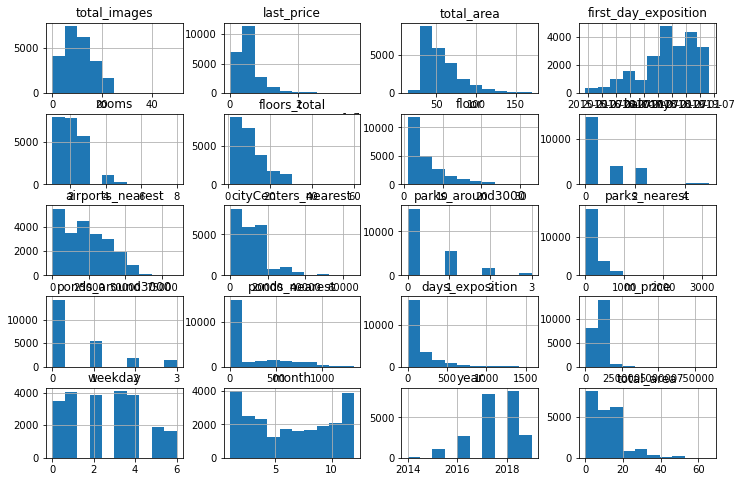

In [74]:
data.loc[data[name] != 'unknown'].hist(figsize=(12, 8))
plt.title(name)
plt.show()

168.34628200631357
95.0


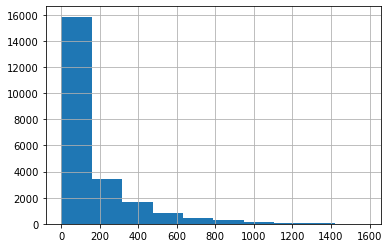

In [75]:
data['days_exposition'].hist()
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

*Вывод по продажам:* Продажа квартиры обычно занимает около 95 дней, однако есть квартиры, которые продаются намного дольше. Продажи быстрее 95 дней можно считать быстрыми, а продажи дольше 160 дней - долгими

,last_price,total_area,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest,floor,floors_total
last_price,1.000000,0.780262,-0.056575,-0.346214,0.043091,-0.130995,0.030615,-0.006792
total_area,0.780262,1.000000,-0.058920,-0.277641,0.010534,-0.101076,-0.030256,-0.074696
airports_nearest,-0.056575,-0.058920,1.000000,0.461006,-0.056283,-0.072507,0.020623,0.049397
cityCenters_nearest,-0.346214,-0.277641,0.461006,1.000000,-0.076105,0.007803,-0.024689,-0.012356
parks_nearest,0.043091,0.010534,-0.056283,-0.076105,1.000000,0.003380,0.045749,0.075159
ponds_nearest,-0.130995,-0.101076,-0.072507,0.007803,0.003380,1.000000,0.035549,0.064620
floor,0.030615,-0.030256,0.020623,-0.024689,0.045749,0.035549,1.000000,0.657595
floors_total,-0.006792,-0.074696,0.049397,-0.012356,0.075159,0.064620,0.657595,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='airports_nearest', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>,
        <AxesSubplot:xlabel='parks_nearest', ylabel='last_price'>,
        <AxesSubplot:xlabel='ponds_nearest', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor', ylabel='last_price'>,
        <AxesSubplot:xlabel='floors_total', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='airports_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='parks_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='ponds_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='floor', ylabel='total_area'>,
     

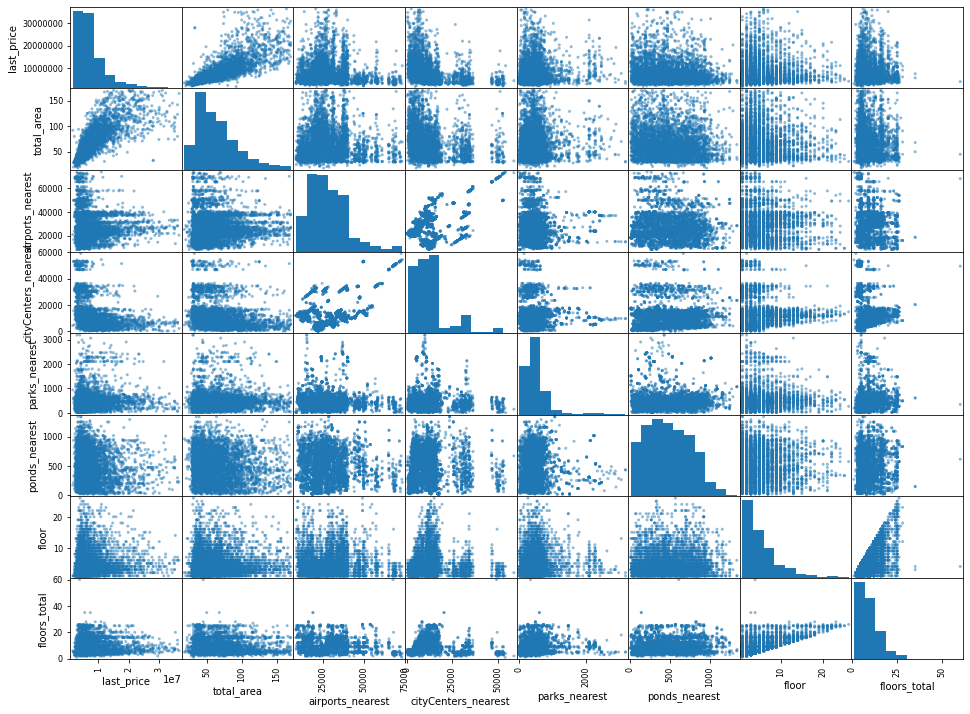

In [76]:
#Найдем связи между данными заранее исключим из анализа данные схожей природы, такие как, например, 
#total_area, living_area, kitchen_area, для таких данных достаточно оставить только одну величину 
#из имеющихся, в данном случае - total_area
subset = ['last_price', 'total_area',  'airports_nearest', 'cityCenters_nearest',
          'parks_nearest',  'ponds_nearest',
         'floor', 'floors_total']
data_copy = data[subset]
for title in subset:
    data_copy = data_copy.loc[(data_copy[title] != 'unknown')&(data_copy[title] != -1)]
display(data_copy.corr())
pd.plotting.scatter_matrix(data_copy, figsize=(16,12))

<AxesSubplot:>

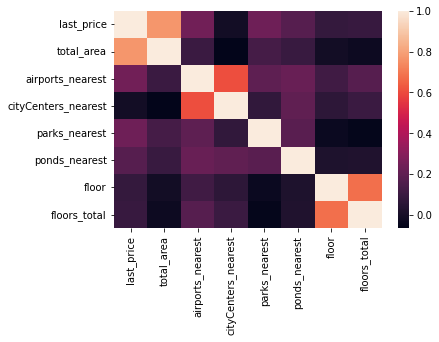

In [77]:
sns.heatmap(data[subset].corr())

Из матрицы разброса можно заметить явную положительную корреляцию между площадью total_area и ценой
Далее построим сводные таблицы

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22808 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22808 non-null  int64         
 1   last_price              22808 non-null  float64       
 2   total_area              22808 non-null  int32         
 3   first_day_exposition    22808 non-null  datetime64[ns]
 4   rooms                   22808 non-null  int64         
 5   ceiling_height          22808 non-null  object        
 6   floors_total            22808 non-null  float64       
 7   living_area             22808 non-null  object        
 8   floor                   22808 non-null  int64         
 9   is_apartment            22808 non-null  bool          
 10  studio                  22808 non-null  bool          
 11  open_plan               22808 non-null  bool          
 12  kitchen_area            22808 non-null  object

,m_price
floor_category,
другой,98280.702119
первый,81395.348837
последний,87500.000000


<AxesSubplot:xlabel='floor_category'>

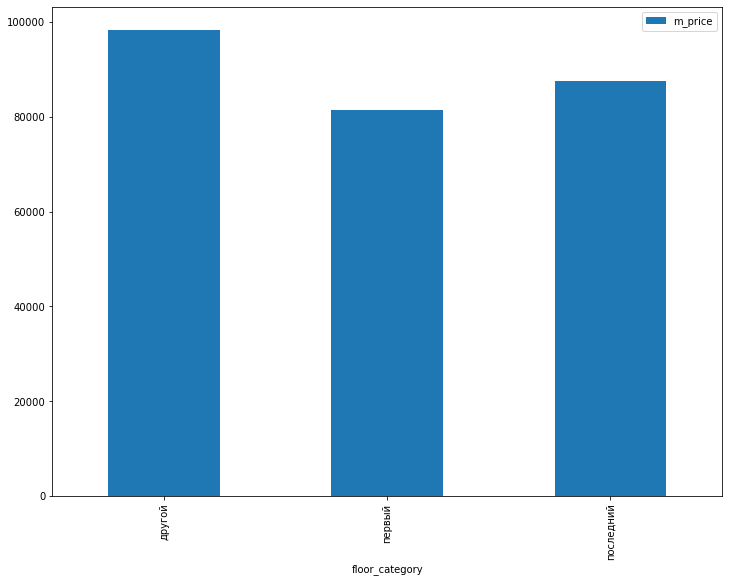

In [79]:
floor_category_table = data.pivot_table(index='floor_category', values='m_price', aggfunc='median')
display(floor_category_table)
floor_category_table.plot(y='m_price', kind='bar', figsize=(12,9))

,m_price
weekday,
0,94732.827832
1,95675.549322
2,95768.679876
3,94957.627119
4,94444.444444
5,93422.803904
6,94339.622642


Text(0.5, 1.0, 'День недели - цена квадратного метра')

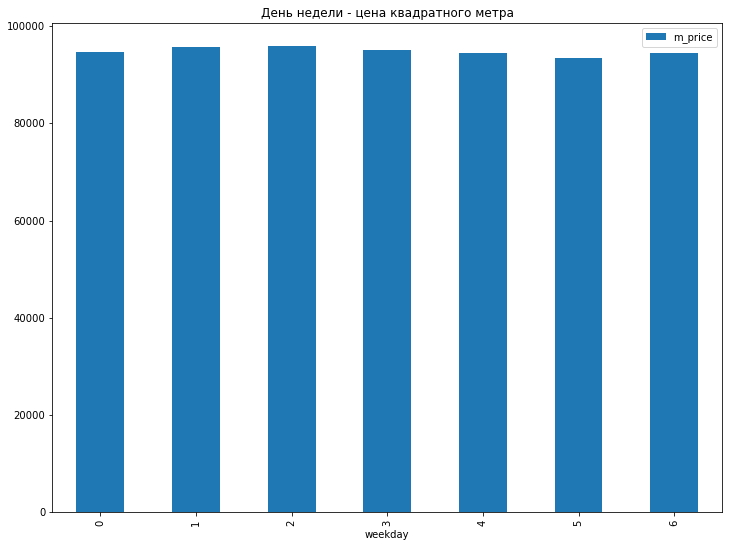

In [80]:
weekday_table = data.pivot_table(index='weekday', values='m_price', aggfunc='median')
display(weekday_table)
weekday_table.plot(y='m_price', kind='bar', figsize=(12,9))
plt.title('День недели - цена квадратного метра')

,m_price
month,
1,95477.272727
2,94957.627119
3,95250.415966
4,96511.627907
5,92647.058824
6,92857.142857
7,94849.690539
8,96286.764706
9,95983.870968


Text(0.5, 1.0, 'Месяц - цена квадратного метра')

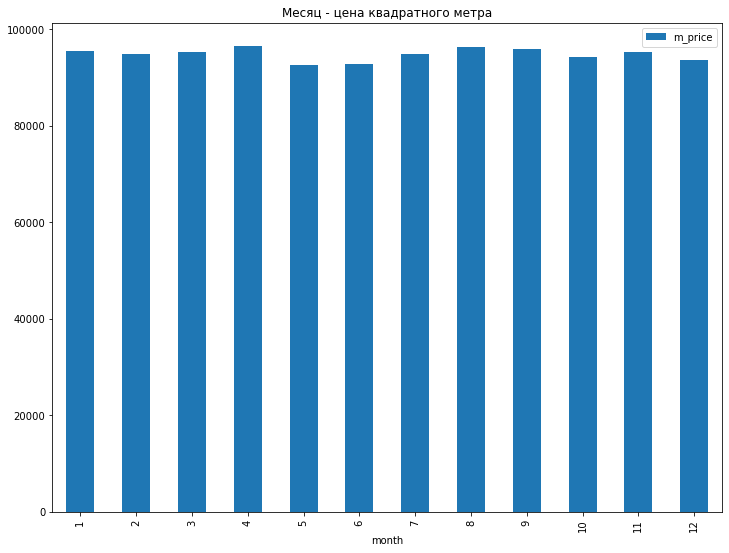

In [81]:
month_table = data.pivot_table(index='month', values='m_price', aggfunc='median')
display(month_table)
month_table.plot(y='m_price', kind='bar', figsize=(12,9))
plt.title('Месяц - цена квадратного метра')

,m_price
year,
2014,105797.101449
2015,92545.252461
2016,91428.571429
2017,92307.692308
2018,95918.643133
2019,103390.804598


Text(0.5, 1.0, 'Год - цена квадратного метра')

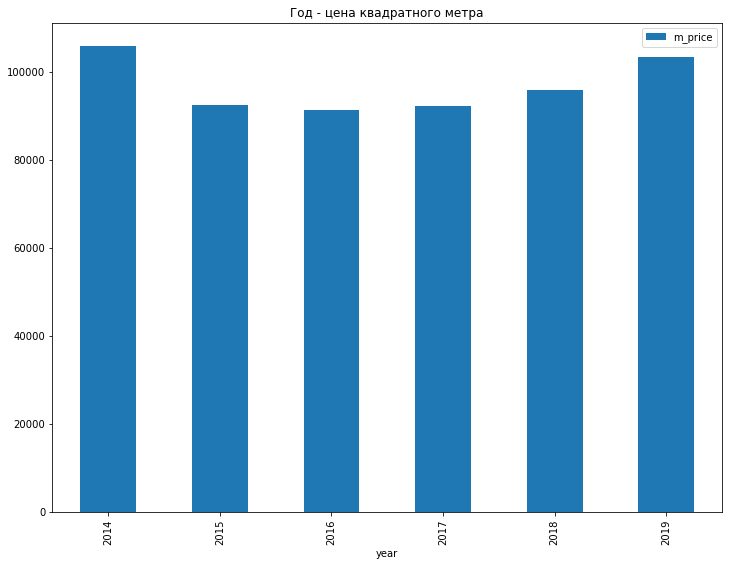

In [82]:
year_table = data.pivot_table(index='year', values='m_price', aggfunc='median')
display(year_table)
year_table.plot(y='m_price', kind='bar', figsize=(12,9))
plt.title('Год - цена квадратного метра')

,last_price
year,
2014,7300000.0
2015,5200000.0
2016,4500000.0
2017,4500000.0
2018,4550000.0
2019,5030000.0


Text(0.5, 1.0, 'Год - цена размещения')

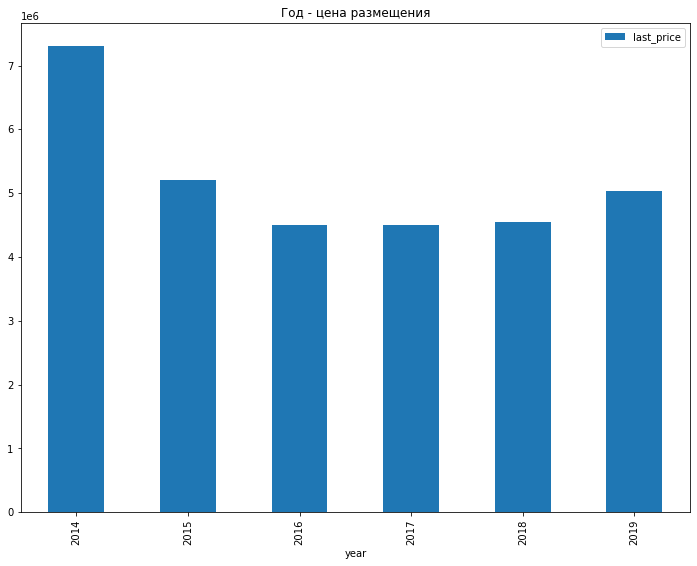

In [83]:
year_table = data.pivot_table(index='year', values='last_price', aggfunc='median')
display(year_table)
year_table.plot(y='last_price', kind='bar', figsize=(12,9))
plt.title('Год - цена размещения')

,m_price
cityCenters_nearest_km,
-0.0,60271.388889
1.0,125421.122995
2.0,117968.750000
3.0,108152.173913
4.0,117391.304348
...,...
61.0,61538.461538
62.0,69565.217391
63.0,63157.894737


Text(0.5, 1.0, 'Расстояние до центра города - цена квадратного метра')

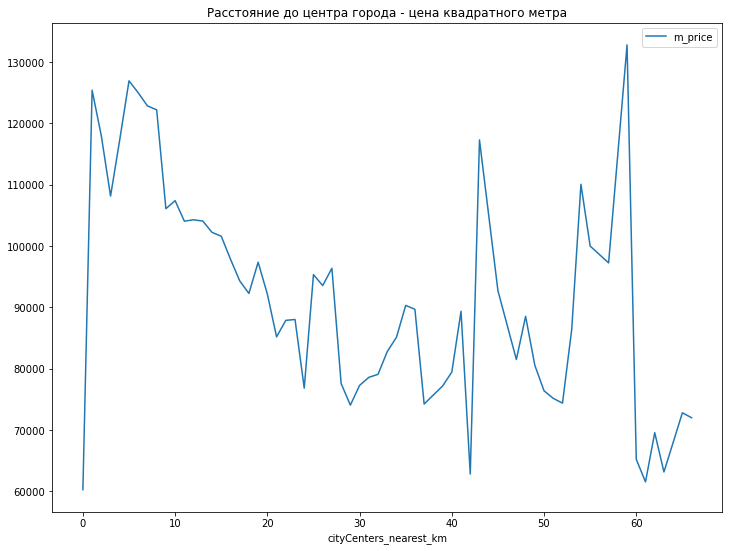

In [84]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()
cityCenters_nearest_km_table = data.pivot_table(index='cityCenters_nearest_km', values='m_price', aggfunc='median')
display(cityCenters_nearest_km_table)
cityCenters_nearest_km_table.plot(y='m_price', figsize=(12,9))
plt.title('Расстояние до центра города - цена квадратного метра')

,m_price
ceiling_height_cm,
100,109090.909091
120,35714.285714
175,102500.000000
200,54392.857143
220,63636.363636
...,...
500,18965.517241
530,78000.000000
800,83582.089552


Text(0.5, 1.0, 'Высота потолка - цена квадратного метра')

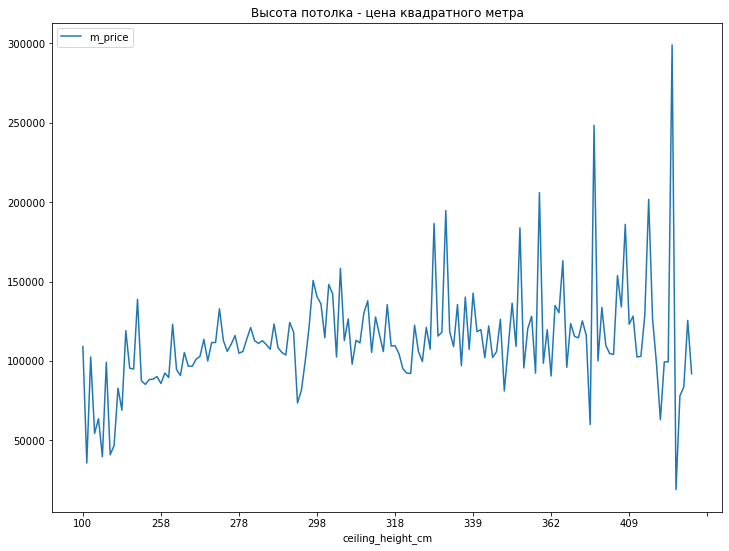

In [85]:
ceiling_height_cm_table = data.pivot_table(index='ceiling_height_cm', values='m_price', aggfunc='median')
display(ceiling_height_cm_table)
ceiling_height_cm_table.plot(y='m_price', figsize=(12,9))
plt.title('Высота потолка - цена квадратного метра')

,m_price
total_area,
14,85000.000000
17,111764.705882
18,121944.444444
20,137000.000000
21,111904.761905
...,...
166,108433.734940
167,115868.263473
168,121964.285714


Text(0.5, 1.0, 'Общая площадь - цена квадратного метра')

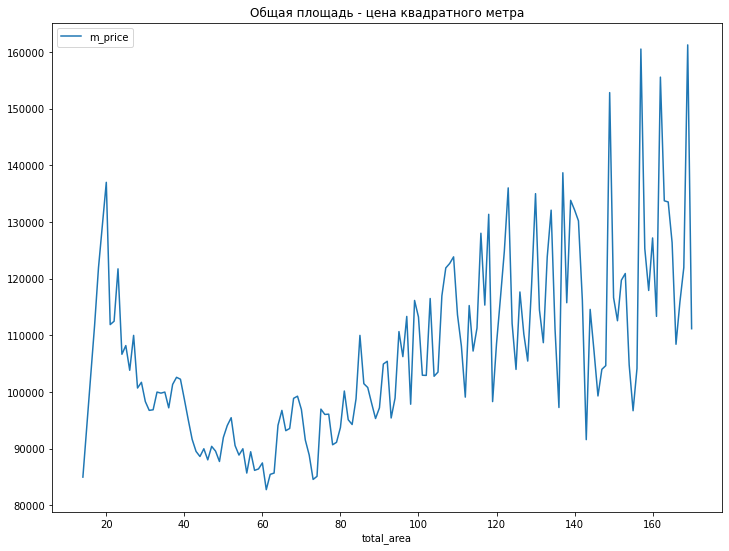

In [86]:
total_area_table = data.pivot_table(index='total_area', values='m_price', aggfunc='median')
display(total_area_table)
total_area_table.plot(y='m_price', figsize=(12,9))
plt.title('Общая площадь - цена квадратного метра')

,m_price
living_area,
2,122115.384615
3,108292.682927
5,79220.779221
6,122637.829912
8,145167.895168
...,...
125,95091.077493
126,117647.058824
128,83287.671233


Text(0.5, 1.0, 'Жилая площадь - цена квадратного метра')

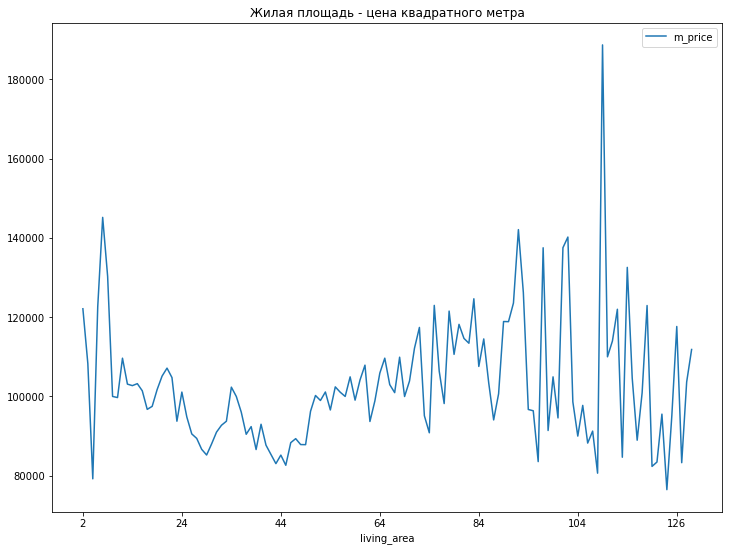

In [87]:
living_area_table = data.pivot_table(index='living_area', values='m_price', aggfunc='median')
display(living_area_table)
living_area_table.plot(y='m_price', figsize=(12,9))
plt.title('Жилая площадь - цена квадратного метра')

,m_price
kitchen_area,
1,151785.714286
2,102548.148148
3,115703.781513
4,80243.902439
5,81395.348837
...,...
60,106956.521739
62,207200.000000
64,88478.137018


Text(0.5, 1.0, 'Площадь кухни - цена квадратного метра')

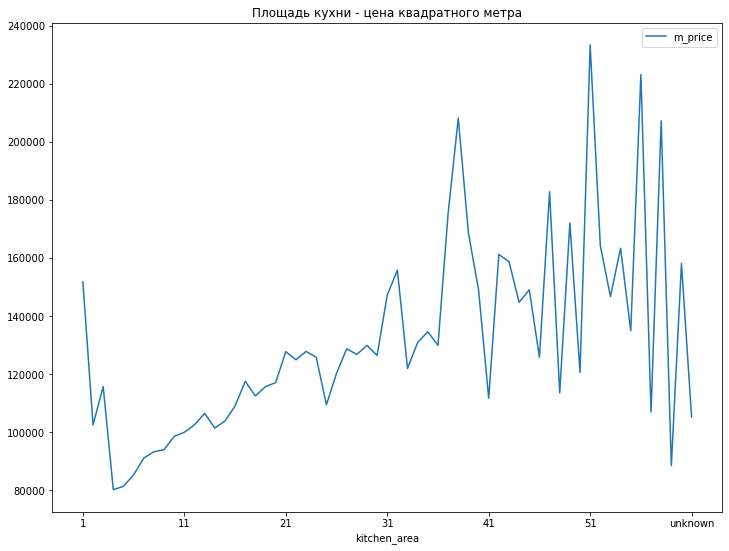

In [88]:
kitchen_area_table = data.pivot_table(index='kitchen_area', values='m_price', aggfunc='median')
display(kitchen_area_table)
kitchen_area_table.plot(y='m_price', figsize=(12,9))
plt.title('Площадь кухни - цена квадратного метра')

,m_price
rooms,
1,100000.000000
2,93037.051636
3,88983.050847
4,90697.674419
5,89525.474479
6,88486.842105
7,111940.298507
8,107333.333333


Text(0.5, 1.0, 'Число комнат - цена квадратного метра')

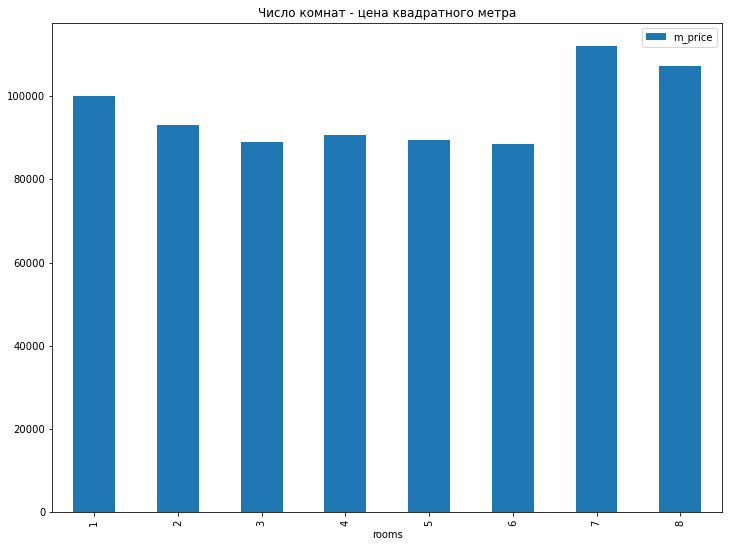

In [89]:
rooms_table = data.pivot_table(index='rooms', values='m_price', aggfunc='median')
display(rooms_table)
rooms_table.plot(y='m_price', figsize=(12,9), kind='bar')
plt.title('Число комнат - цена квадратного метра')

*Вывод по ценообразованию:* На основе проведенного анализа выделим ключевые факторы определяющие цену квадратного метра в жилом помещении:
- Цена квадратного метра на первом и последнем этажах ниже, чем на любом другом, при этом на первом этаже дешевле чем на последнем
- В мае и июне цена квадратного метра немного ниже, чем в другие месяцы
- В с 2014 по 2016 цена квадратного метра снижалась, затем зафиксировалась на одном уровне и немного вырасла в 2019 году
- Чем дальше от городских центров, тем ниже цена квадратного метра, самая низкая цена указана в объектов, для которых расстояние до городского центра не указано (не известно)
- Чем выше общая площадь объекта, тем ниже цена квадратного метра
- Очень высокая цена квадратного метра для объектов с небольшой площадью кухни, далее резкое падение и рост стоимости с увеличением площади кухни
- Цена квадратного метра снижается с 1 до 3 комнат, затем остается на одном уровне, затем резко растет для 7 комнат и немного снижается для 8



Найдем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

,count,mean
locality_name,,
Санкт-Петербург,15072,111509.842423
поселок Мурино,540,85660.719516
деревня Кудрово,438,95558.463402
поселок Шушары,434,78747.888409
Всеволожск,387,68918.070114
Пушкин,363,103540.481522
Колпино,335,75604.973869
поселок Парголово,321,90904.942888
Гатчина,303,68928.465779


<AxesSubplot:xlabel='locality_name'>

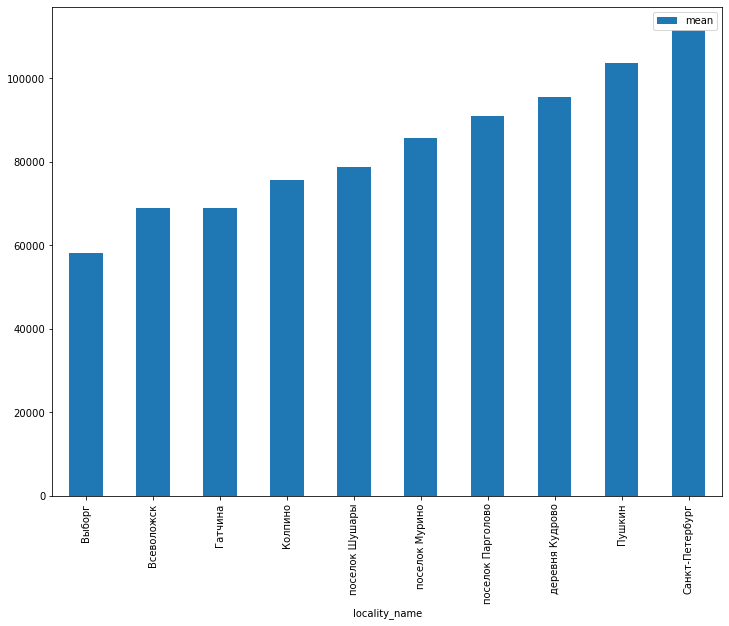

In [90]:
popular_locality = data.pivot_table(index='locality_name', values='m_price', aggfunc=['count', 'mean'])
popular_locality.columns = ['count', 'mean']
popular_locality = popular_locality.sort_values(by='count', ascending=False).head(10)
display(popular_locality)
popular_locality.sort_values(by='mean').plot(y='mean', kind='bar', figsize=(12,9))

*Вывод:* Среди популярных мест самая высокая средняя цена квадратного метра в Санкт-Петербурге и Пушкино, самая низкая в Выборге и Всеволожске

Опишем, как стоимость объектов зависит от расстояния до центра Санкт-Петербурга.

Text(0.5, 1.0, 'Расстояние до центра Санкт-Петербурга - цена квадратного метра')

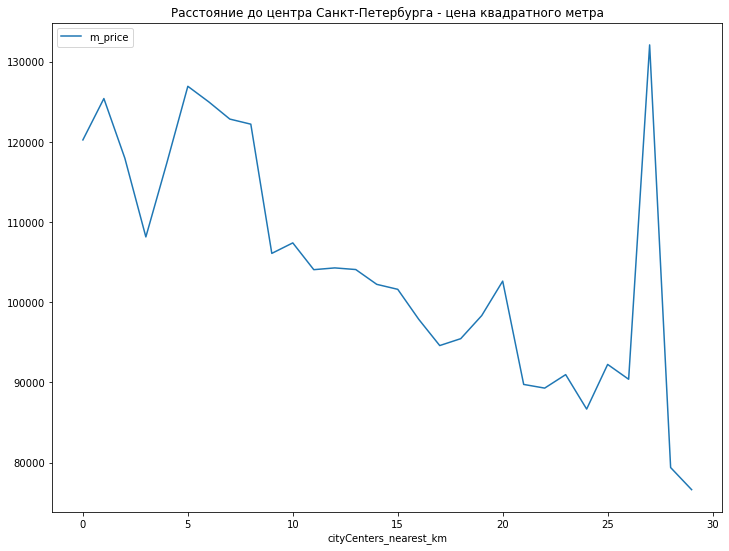

In [91]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='m_price', aggfunc='median'\
    ).sort_values(by='cityCenters_nearest_km').plot(figsize=(12,9))
plt.title('Расстояние до центра Санкт-Петербурга - цена квадратного метра')

*Вывод:* По мере удаления от центра стоимость квадратного метра снижается

### Общий вывод

Проведена очистка и подготовка к анализу:
- Пропущеные значения заменены на медианные, либо -1, либо 0, либо 'unknown', подробнее в выводе по предобработке
- Удалены значения total_area, last_price больше чем 99 процентиль
- Удалены объекты недвижимости с 0 комнат
- Удалены строки, в которых высота потолка составляет 10.4, 14, 100 метров, для остальных значений >10 точка сдвинута на один десятичный знак влево
- Удалены некоторые другие значения, подробнее в соответствующем выводе

Выполнен исследовательский анализ данных. В ходе анализа исследованы:
- Время продажи объекта недвижимости
- Факторы, определяющие стоимость объекта недвижимости
- Рассчитана средняя стоимость квадратного метра в 10 местах с наибольшим количеством объявлений
- Определено, как изменяется цена квадратного метра в Санкт-Петербурге по мере удаления от центра города

Обнаружены следующие взаимосвязи в данных:
- Продажу жилья быстрее 95 дней можно считать быстрой, дольше 160 дней - долгой
- Цена квадратного метра снижается по мере удаления от центра города
- Цена квадратного метра ниже всего на первом и последнем этаже, при этом на первом ниже, чем на последнем
- В с 2014 по 2016 цена квадратного метра снижалась, затем зафиксировалась на одном уровне и немного вырасла в 2019 году
- Среди популярных мест самая высокая средняя цена квадратного метра в Санкт-Петербурге и Пушкино, самая низкая в Выборге и Всеволожске

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод